In [1]:
import pandas as pd
import numpy as np

# Basic Ingredients - Series

In [2]:
pd.Series(np.random.rand(5), index=['a', 'b', 'c', 'd', 'e'])

a    0.812985
b    0.123709
c    0.726468
d    0.303169
e    0.843475
dtype: float64

In [3]:
pd.Series(np.random.rand(5))

0    0.856304
1    0.734639
2    0.402970
3    0.031917
4    0.312699
dtype: float64

In [4]:
pd.Series({'a': 1, 'b': 2, 'c': 3})

a    1
b    2
c    3
dtype: int64

In [5]:
pd.Series(42, index=range(5))

0    42
1    42
2    42
3    42
4    42
dtype: int64

## Accessing data

In [68]:
s = pd.Series(np.random.rand(5), index=['a', 'b', 'c', 'd', 'e'])

In [7]:
s

a    0.627256
b    0.158943
c    0.296837
d    0.048814
e    0.529809
dtype: float64

In [8]:
s[2]

0.296837365179515

In [9]:
s['c']

0.296837365179515

In [10]:
'b' in s

True

In [11]:
'z' in s

False

In [12]:
s.get('c', float('nan'))

0.296837365179515

In [13]:
s.get('z', float('nan'))

nan

In [14]:
s[1:]

b    0.158943
c    0.296837
d    0.048814
e    0.529809
dtype: float64

In [15]:
s[2:4]

c    0.296837
d    0.048814
dtype: float64

In [16]:
s[:-2]

a    0.627256
b    0.158943
c    0.296837
dtype: float64

In [17]:
s['a':'c'] # careful

a    0.627256
b    0.158943
c    0.296837
dtype: float64

In [18]:
s.array

<PandasArray>
[   0.627256180312388,  0.15894266539931812,    0.296837365179515,
 0.048814411663918755,   0.5298094838214884]
Length: 5, dtype: float64

## Arithmetic

In [19]:
s + s

a    1.254512
b    0.317885
c    0.593675
d    0.097629
e    1.059619
dtype: float64

In [20]:
s * 2

a    1.254512
b    0.317885
c    0.593675
d    0.097629
e    1.059619
dtype: float64

In [21]:
s ** 2

a    0.393450
b    0.025263
c    0.088112
d    0.002383
e    0.280698
dtype: float64

In [22]:
np.sin(s)

a    0.586925
b    0.158274
c    0.292497
d    0.048795
e    0.505369
dtype: float64

In [23]:
s.apply(lambda x: x + 1)

a    1.627256
b    1.158943
c    1.296837
d    1.048814
e    1.529809
dtype: float64

In [24]:
s + 1

a    1.627256
b    1.158943
c    1.296837
d    1.048814
e    1.529809
dtype: float64

In [25]:
s + s[1:]

a         NaN
b    0.317885
c    0.593675
d    0.097629
e    1.059619
dtype: float64

In [26]:
np.exp(s + s[1:])

a         NaN
b    1.374219
c    1.810630
d    1.102553
e    2.885271
dtype: float64

## Plotting

<AxesSubplot:>

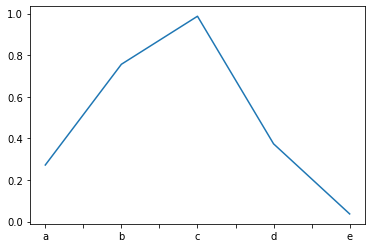

In [70]:
s.plot.line()

<AxesSubplot:>

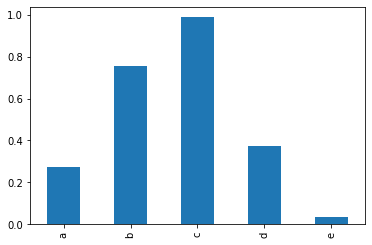

In [69]:
s.plot.bar()

In [65]:
import matplotlib.pyplot as plt

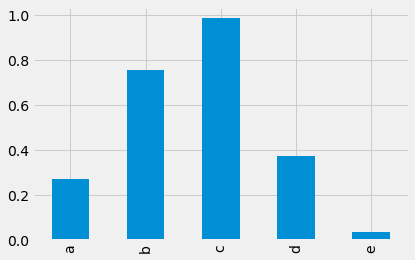

In [72]:
with plt.style.context('fivethirtyeight'):
    s.plot.bar()

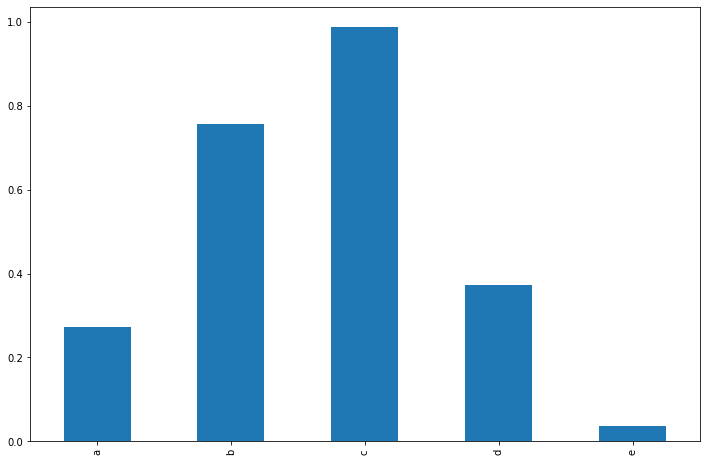

In [78]:
with plt.rc_context({'figure.figsize': (12, 8)}):
    s.plot.bar()

## Time Series

In [40]:
ts = pd.Series(10*np.linspace(0, 1, 100) + np.random.normal(0, 1, size=100),
              index=pd.date_range('2022-01-01', '2022-05-01', 100))

<AxesSubplot:>

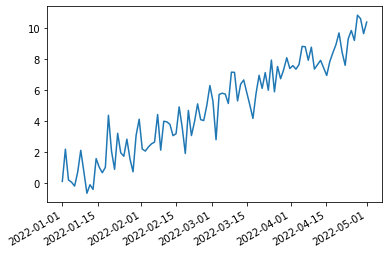

In [41]:
ts.plot.line()

<AxesSubplot:>

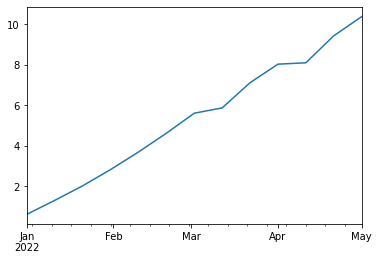

In [49]:
ts.resample('10D').mean().plot.line()

<AxesSubplot:>

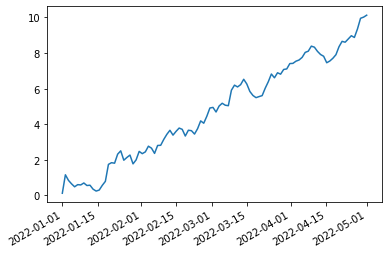

In [50]:
ts.rolling('5D').mean().plot.line()

# Data Frames

In [51]:
noble_gases = pd.DataFrame(
    {'Atomic Number': [2, 10, 18, 32],
     'Atomic Radius': [31, 38, 71, 88]},
    index=['He', 'Ne', 'Ar', 'Kr']
)

In [52]:
noble_gases

,Atomic Number,Atomic Radius
He,2,31
Ne,10,38
Ar,18,71
Kr,32,88


In [53]:
noble_gases['Atomic Number']

He     2
Ne    10
Ar    18
Kr    32
Name: Atomic Number, dtype: int64

In [54]:
noble_gases['Atomic Number'].index

Index(['He', 'Ne', 'Ar', 'Kr'], dtype='object')

In [55]:
noble_gases.index

Index(['He', 'Ne', 'Ar', 'Kr'], dtype='object')

In [56]:
noble_gases['Density'] = [0.1786, 0.9002, 1.7818, 3.708]

In [57]:
noble_gases

,Atomic Number,Atomic Radius,Density
He,2,31,0.1786
Ne,10,38,0.9002
Ar,18,71,1.7818
Kr,32,88,3.7080


In [58]:
noble_gases.Density

He    0.1786
Ne    0.9002
Ar    1.7818
Kr    3.7080
Name: Density, dtype: float64

In [59]:
noble_gases['Density']

He    0.1786
Ne    0.9002
Ar    1.7818
Kr    3.7080
Name: Density, dtype: float64

<AxesSubplot:>

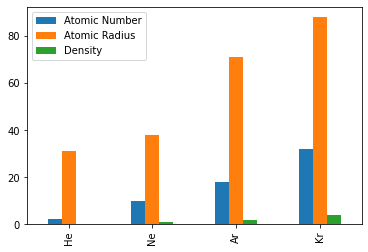

In [60]:
noble_gases.plot.bar()

<AxesSubplot:>

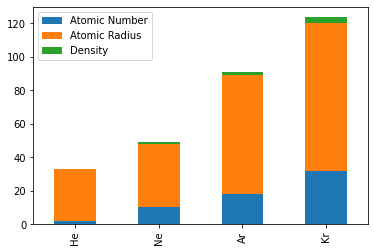

In [62]:
noble_gases.plot.bar(stacked=True) # makes little sense

<AxesSubplot:>

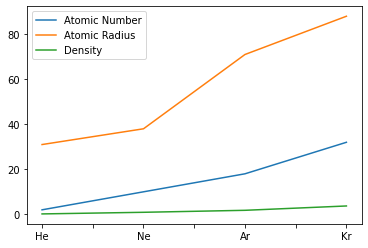

In [64]:
noble_gases.plot.line()

In [38]:
noble_gases['foo'] = pd.Series({'Ne': 2, 'Ar': 4})

In [39]:
noble_gases

,Atomic Number,Atomic Radius,Density,foo
He,2,31,0.1786,NaN
Ne,10,38,0.9002,2.0
Ar,18,71,1.7818,4.0
Kr,32,88,3.7080,NaN


In [40]:
noble_gases.pop('foo')

He    NaN
Ne    2.0
Ar    4.0
Kr    NaN
Name: foo, dtype: float64

In [41]:
noble_gases

,Atomic Number,Atomic Radius,Density
He,2,31,0.1786
Ne,10,38,0.9002
Ar,18,71,1.7818
Kr,32,88,3.7080


In [43]:
noble_gases[['Atomic Number', 'Density']]

,Atomic Number,Density
He,2,0.1786
Ne,10,0.9002
Ar,18,1.7818
Kr,32,3.7080


## Accessing Rows

In [44]:
noble_gases.loc['He']

Atomic Number     2.0000
Atomic Radius    31.0000
Density           0.1786
Name: He, dtype: float64

In [45]:
noble_gases.loc['Ne':'Ar']

,Atomic Number,Atomic Radius,Density
Ne,10,38,0.9002
Ar,18,71,1.7818


In [46]:
noble_gases.loc['Ne':'Ar', 'Atomic Radius']

Ne    38
Ar    71
Name: Atomic Radius, dtype: int64

In [48]:
noble_gases.loc['Ne':'Ar', 'Atomic Radius':]

,Atomic Radius,Density
Ne,38,0.9002
Ar,71,1.7818


In [49]:
noble_gases.iloc[1:3]

,Atomic Number,Atomic Radius,Density
Ne,10,38,0.9002
Ar,18,71,1.7818


In [50]:
noble_gases.iloc[1]

Atomic Number    10.0000
Atomic Radius    38.0000
Density           0.9002
Name: Ne, dtype: float64

In [51]:
noble_gases.iloc[1:3, 1]

Ne    38
Ar    71
Name: Atomic Radius, dtype: int64

## Filtering

In [53]:
noble_gases['Atomic Number'] > 10

He    False
Ne    False
Ar     True
Kr     True
Name: Atomic Number, dtype: bool

In [54]:
noble_gases[noble_gases['Atomic Number'] > 10]

,Atomic Number,Atomic Radius,Density
Ar,18,71,1.7818
Kr,32,88,3.7080


## Sampling

In [55]:
noble_gases.sample(n=2)

,Atomic Number,Atomic Radius,Density
Ne,10,38,0.9002
Kr,32,88,3.7080


In [62]:
noble_gases.sample(n=4, replace=True)

,Atomic Number,Atomic Radius,Density
Ar,18,71,1.7818
Kr,32,88,3.7080
Kr,32,88,3.7080
Ne,10,38,0.9002


## Arithmetic

In [63]:
noble_gases + noble_gases

,Atomic Number,Atomic Radius,Density
He,4,62,0.3572
Ne,20,76,1.8004
Ar,36,142,3.5636
Kr,64,176,7.4160


In [64]:
noble_gases * 2

,Atomic Number,Atomic Radius,Density
He,4,62,0.3572
Ne,20,76,1.8004
Ar,36,142,3.5636
Kr,64,176,7.4160


In [65]:
np.exp(noble_gases)

,Atomic Number,Atomic Radius,Density
He,7.389056e+00,2.904885e+13,1.195542
Ne,2.202647e+04,3.185593e+16,2.460095
Ar,6.565997e+07,6.837671e+30,5.940540
Kr,7.896296e+13,1.651636e+38,40.772181


## Transpose

In [66]:
noble_gases.T

,He,Ne,Ar,Kr
Atomic Number,2.0000,10.0000,18.0000,32.000
Atomic Radius,31.0000,38.0000,71.0000,88.000
Density,0.1786,0.9002,1.7818,3.708


# Data I/O

In [68]:
!cat noble_gases.csv # careful with big files

,Atomic Number,Atomic Radius,Density
He,2,31,0.1786
Ne,10,38,0.9002
Ar,18,71,1.7818
Kr,32,88,3.708


In [70]:
pd.read_csv('noble_gases.csv', index_col=0)

,Atomic Number,Atomic Radius,Density
He,2,31,0.1786
Ne,10,38,0.9002
Ar,18,71,1.7818
Kr,32,88,3.7080


In [119]:
noble_gases.to_csv('noble_gases.csv')

In [120]:
!cat noble_gases.csv # careful with big files

,Atomic Number,Atomic Radius,Density
He,2,31,0.1786
Ne,10,38,0.9002
Ar,18,71,1.7818
Kr,32,88,3.708


In [75]:
[m for m in dir(pd) if m.startswith('read_')]

['read_clipboard',
 'read_csv',
 'read_excel',
 'read_feather',
 'read_fwf',
 'read_gbq',
 'read_hdf',
 'read_html',
 'read_json',
 'read_orc',
 'read_parquet',
 'read_pickle',
 'read_sas',
 'read_spss',
 'read_sql',
 'read_sql_query',
 'read_sql_table',
 'read_stata',
 'read_table',
 'read_xml']

In [76]:
[m for m in dir(noble_gases) if m.startswith('to_')]

['to_clipboard',
 'to_csv',
 'to_dict',
 'to_excel',
 'to_feather',
 'to_gbq',
 'to_hdf',
 'to_html',
 'to_json',
 'to_latex',
 'to_markdown',
 'to_numpy',
 'to_parquet',
 'to_period',
 'to_pickle',
 'to_records',
 'to_sql',
 'to_stata',
 'to_string',
 'to_timestamp',
 'to_xarray',
 'to_xml']

In [78]:
noble_gases.to_dict()

{'Atomic Number': {'He': 2, 'Ne': 10, 'Ar': 18, 'Kr': 32},
 'Atomic Radius': {'He': 31, 'Ne': 38, 'Ar': 71, 'Kr': 88},
 'Density': {'He': 0.1786, 'Ne': 0.9002, 'Ar': 1.7818, 'Kr': 3.708}}

# Reshaping data

In [79]:
noble_gases

,Atomic Number,Atomic Radius,Density
He,2,31,0.1786
Ne,10,38,0.9002
Ar,18,71,1.7818
Kr,32,88,3.7080


In [80]:
noble_gases.stack()

He  Atomic Number     2.0000
    Atomic Radius    31.0000
    Density           0.1786
Ne  Atomic Number    10.0000
    Atomic Radius    38.0000
    Density           0.9002
Ar  Atomic Number    18.0000
    Atomic Radius    71.0000
    Density           1.7818
Kr  Atomic Number    32.0000
    Atomic Radius    88.0000
    Density           3.7080
dtype: float64

In [81]:
noble_gases.stack()['He', 'Atomic Radius']

31.0

In [82]:
noble_gases.stack().index

MultiIndex([('He', 'Atomic Number'),
            ('He', 'Atomic Radius'),
            ('He',       'Density'),
            ('Ne', 'Atomic Number'),
            ('Ne', 'Atomic Radius'),
            ('Ne',       'Density'),
            ('Ar', 'Atomic Number'),
            ('Ar', 'Atomic Radius'),
            ('Ar',       'Density'),
            ('Kr', 'Atomic Number'),
            ('Kr', 'Atomic Radius'),
            ('Kr',       'Density')],
           )

In [83]:
noble_gases.stack().unstack()

,Atomic Number,Atomic Radius,Density
He,2.0,31.0,0.1786
Ne,10.0,38.0,0.9002
Ar,18.0,71.0,1.7818
Kr,32.0,88.0,3.7080


# Missing

In [84]:
noble_gases['foo'] = pd.Series({'Ar': 5, 'He': 2})

In [85]:
noble_gases

,Atomic Number,Atomic Radius,Density,foo
He,2,31,0.1786,2.0
Ne,10,38,0.9002,NaN
Ar,18,71,1.7818,5.0
Kr,32,88,3.7080,NaN


In [86]:
noble_gases.dropna()

,Atomic Number,Atomic Radius,Density,foo
He,2,31,0.1786,2.0
Ar,18,71,1.7818,5.0


In [88]:
noble_gases.dropna(axis=1)

,Atomic Number,Atomic Radius,Density
He,2,31,0.1786
Ne,10,38,0.9002
Ar,18,71,1.7818
Kr,32,88,3.7080


In [89]:
noble_gases.fillna(1.2)

,Atomic Number,Atomic Radius,Density,foo
He,2,31,0.1786,2.0
Ne,10,38,0.9002,1.2
Ar,18,71,1.7818,5.0
Kr,32,88,3.7080,1.2


In [90]:
del noble_gases['foo']

In [92]:
noble_gases

,Atomic Number,Atomic Radius,Density
He,2,31,0.1786
Ne,10,38,0.9002
Ar,18,71,1.7818
Kr,32,88,3.7080


# Sorting

In [95]:
noble_gases.sample(4).sort_values(by="Atomic Number")

,Atomic Number,Atomic Radius,Density
He,2,31,0.1786
Ne,10,38,0.9002
Ar,18,71,1.7818
Kr,32,88,3.7080


In [96]:
noble_gases.sort_index()

,Atomic Number,Atomic Radius,Density
Ar,18,71,1.7818
He,2,31,0.1786
Kr,32,88,3.7080
Ne,10,38,0.9002


# Combining Data

In [97]:
left = noble_gases[['Atomic Number', 'Atomic Radius']]
right = noble_gases[['Density']]

In [98]:
right

,Density
He,0.1786
Ne,0.9002
Ar,1.7818
Kr,3.7080


In [99]:
noble_gases['Density']

He    0.1786
Ne    0.9002
Ar    1.7818
Kr    3.7080
Name: Density, dtype: float64

In [100]:
right.join(left)

,Density,Atomic Number,Atomic Radius
He,0.1786,2,31
Ne,0.9002,10,38
Ar,1.7818,18,71
Kr,3.7080,32,88


In [101]:
pd.merge(left, right, left_index=True, right_index=True)

,Atomic Number,Atomic Radius,Density
He,2,31,0.1786
Ne,10,38,0.9002
Ar,18,71,1.7818
Kr,32,88,3.7080


In [104]:
left.join(right.loc['Ne':'Ar'])

,Atomic Number,Atomic Radius,Density
He,2,31,NaN
Ne,10,38,0.9002
Ar,18,71,1.7818
Kr,32,88,NaN


In [105]:
left.join(right.loc['Ne':'Ar'], how='inner')

,Atomic Number,Atomic Radius,Density
Ne,10,38,0.9002
Ar,18,71,1.7818


In [110]:
noble_gases[:'Ne']

,Atomic Number,Atomic Radius,Density
He,2,31,0.1786
Ne,10,38,0.9002


In [112]:
noble_gases['Ar':]

,Atomic Number,Atomic Radius,Density
Ar,18,71,1.7818
Kr,32,88,3.7080


In [118]:
pd.concat((noble_gases[:'Ne'], noble_gases['Ar':]))

,Atomic Number,Atomic Radius,Density
He,2,31,0.1786
Ne,10,38,0.9002
Ar,18,71,1.7818
Kr,32,88,3.7080
